<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
# Import tensor flow and data set
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing



# load the boston housing data into train/test sets.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
# Exploring a sample of the features

print(X_train[0], y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


In [3]:
# Import sklearn tools for preprocessing, and use to normalize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train)

# Call the transform method to scale both the training and testind data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print a sample (sanity check)
print(X_train_scaled[0])


[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [4]:
# Show the scale on all of the data

print(X_train)
print("---")
print(X_train)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
---
[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


### Sequential Model 1

In [5]:
# Import model and layer tools from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
# Instantiated a model object
model1 = Sequential()

# Added hidden layers to my model with activation features
model1.add(Dense(50, activation='relu', autocast=False))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(50, activation='relu'))

# Added output Layer with activation features
model1.add(Dense(1, activation='relu'))

# Compiling model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Call the fit method to start training include validation set
history = model1.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=35, epochs=100, verbose=1)


Epoch 1/100
10/10 [==============================] - 0s 16ms/step - loss: 539.7458 - mean_squared_error: 539.7458 - val_loss: 565.5138 - val_mean_squared_error: 565.5138
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 465.4344 - mean_squared_error: 465.4344 - val_loss: 463.2373 - val_mean_squared_error: 463.2373
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 352.4573 - mean_squared_error: 352.4573 - val_loss: 308.9710 - val_mean_squared_error: 308.9710
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 203.2722 - mean_squared_error: 203.2722 - val_loss: 145.2720 - val_mean_squared_error: 145.2720
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 98.1193 - mean_squared_error: 98.1193 - val_loss: 94.3660 - val_mean_squared_error: 94.3660
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 81.8429 - mean_squared_error: 81.8429 - val_loss: 72.5251 - val_mean_squared_error: 7

In [7]:
# Show the tracking history of the model
history.history

{'loss': [539.7457885742188,
  465.4343566894531,
  352.457275390625,
  203.27215576171875,
  98.11927032470703,
  81.84286499023438,
  57.403968811035156,
  45.66410827636719,
  36.0020751953125,
  29.889768600463867,
  26.621061325073242,
  24.050508499145508,
  22.034648895263672,
  20.768611907958984,
  19.38173484802246,
  18.03502655029297,
  17.149572372436523,
  16.22880744934082,
  15.258318901062012,
  14.546606063842773,
  13.887463569641113,
  13.212996482849121,
  13.130159378051758,
  12.174786567687988,
  11.94579029083252,
  11.41360092163086,
  11.031903266906738,
  10.673742294311523,
  10.350981712341309,
  10.266945838928223,
  9.879339218139648,
  9.755894660949707,
  9.345799446105957,
  9.21578311920166,
  8.898969650268555,
  8.817032814025879,
  8.573701858520508,
  8.557701110839844,
  8.495697975158691,
  8.525883674621582,
  8.246527671813965,
  8.27022647857666,
  8.168553352355957,
  7.993259429931641,
  7.734795093536377,
  7.693812847137451,
  7.47155809

In [8]:
# evalute model to get test scores. (loss = MSE at compile time)
scores = model1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2370747.5000 - mean_squared_error: 2370747.5000


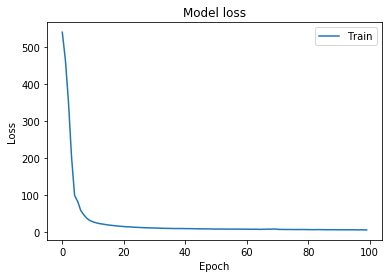

In [9]:
# Import for visualization
import matplotlib.pyplot as plt

# plot the loss-MSE value.
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

### Linear Regression Model

In [10]:
# Imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# set the linear regression model.
L_model = LinearRegression()

# fit the model on the data.
L_model.fit(X_train_scaled, y_train)

# label and create them model.predict(X_test).
y_pred = L_model.predict(X_test_scaled)

# get the regression metrics.
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# show all the regression metric results.
print(X_train_scaled.shape, X_test.shape)
print('Test Mean Squared Error:', test_mse)
print('Test Mean Absolute Error:', test_mae)
print('Test R^2:', test_r2)

(404, 13) (102, 13)
Test Mean Squared Error: 23.195599256422973
Test Mean Absolute Error: 3.4641858124067166
Test R^2: 0.7213535934621553


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [11]:
# Imports.
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# load the mnist data.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

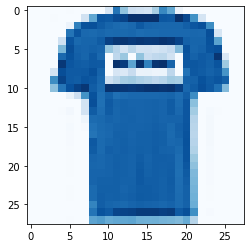

In [12]:
# imports.
import matplotlib.pyplot as plt 

# Plot what row 2 looks like.
plt.imshow(X_train[1], cmap='Blues')

In [13]:
# X Variable Types
num_classes = 10

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

np.random.seed(812)

In [16]:
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()

In [17]:
from tensorflow.keras.layers import Flatten

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation="softmax"))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.5974 - accuracy: 0.8000
Epoch 2/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.4615 - accuracy: 0.8435
Epoch 3/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.4351 - accuracy: 0.8495
Epoch 4/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.4221 - accuracy: 0.8550
Epoch 5/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.4121 - accuracy: 0.8580
Epoch 6/10
1875/1875 [==============================] - 2s 846us/step - loss: 0.4067 - accuracy: 0.8584
Epoch 7/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.4028 - accuracy: 0.8609
Epoch 8/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.3980 - accuracy: 0.8620
Epoch 9/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.3948 - accuracy: 0.8635
Epoch 10/10
1875/1875 [==============================] - 2s 936u

In [21]:
model.fit(X_train, y_train, 
          epochs=3, 
          validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3889 - accuracy: 0.8635 - val_loss: 0.4430 - val_accuracy: 0.8443
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3880 - accuracy: 0.8648 - val_loss: 0.4706 - val_accuracy: 0.8350
Epoch 3/3
1875/1875 [==============================] - 2s 994us/step - loss: 0.3853 - accuracy: 0.8653 - val_loss: 0.4433 - val_accuracy: 0.8446


In [22]:
scores = model.evaluate(X_test, y_test)
print("\n")
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")

313/313 [==============================] - 0s 716us/step - loss: 0.4433 - accuracy: 0.8446


Validation Data Metrics:
loss: 0.44326552748680115
accuracy: 84.46000218391418


In [23]:
%pwd

'C:\\Users\\kjshe\\OneDrive\\Desktop\\DS-Unit-4-Sprint-2-Neural-Networks\\module3-Intro-to-Keras'

In [24]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [25]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

results = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=5, 
                    validation_data=(X_test, y_test), 
                    callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5031 - accuracy: 0.8218 - val_loss: 0.4226 - val_accuracy: 0.8472
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8634 - val_loss: 0.4036 - val_accuracy: 0.8550
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3358 - accuracy: 0.8787 - val_loss: 0.3665 - val_accuracy: 0.8661
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8849 - val_loss: 0.3702 - val_accuracy: 0.8685
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8928 - val_loss: 0.3736 - val_accuracy: 0.8642


In [26]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 42224), started 1 day, 3:25:01 ago. (Use '!kill 42224' to kill it.)

### Super simple NN for fashion_mnist date without activation function

In [27]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the Data
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

# Normalize the data
train_images=train_images/255.0
test_images=test_images/255.0

# Build the model with no activation functions
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128),
                             tf.keras.layers.Dense(10)])
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Fit the model
model.fit(train_images, train_labels,epochs=10, callbacks=[tensorboard_callback])

# Test the model
test_loss, test_acc = model.evaluate(test_images,test_labels)

# Print Test Accuracy
print('Test Accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5404 - accuracy: 0.8138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4562 - accuracy: 0.8426
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4406 - accuracy: 0.8456
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4334 - accuracy: 0.8489
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4235 - accuracy: 0.8508
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4180 - accuracy: 0.8526
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4140 - accuracy: 0.8556
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4088 - accuracy: 0.8571
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4077 - accuracy: 0.8571
Epoch 10/10
313/313 [==============================] - 0s 879us/step - loss: 0.478

In [29]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 42224), started 1 day, 3:25:50 ago. (Use '!kill 42224' to kill it.)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.